In [25]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [26]:
df = pd.read_csv("iris-dataset.csv")

In [27]:
# Separate features and labels
X = df.iloc[:, :-1].values  # all columns except last (species)
y = df.iloc[:, -1].values   # species column
X.shape[1]

4

In [28]:
# Rozdělení a zapsání trénovací a testovací části na disk
train, test = train_test_split(df, test_size=0.2)
train.to_csv("./iris-train.csv", index=False)
test.to_csv("./iris-test.csv", index=False)

In [29]:
# Kódování cílové proměnné
# (setosa -> 0, versicolor -> 1, virginica -> 2)
label_encoder = LabelEncoder()
y_int = label_encoder.fit_transform(y)  # numerické hodnoty labelu

In [30]:
# One-hot kodovaní
onehot_encoder = OneHotEncoder(sparse_output=False)
y_onehot = onehot_encoder.fit_transform(y_int.reshape(-1, 1))


In [31]:
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y_onehot, test_size=0.2, random_state=42)

In [32]:
model = tf.keras.Sequential([
    tf.keras.Input(shape=(X.shape[1],)),  
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 10)             │            50 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 3)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 193 (772.00 B)

 Trainable params: 193 (772.00 B)

 Non-trainable params: 0 (0.00 B)

In [33]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy','precision','recall'])

In [34]:
# Train model
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_split=0.2)


Epoch 1/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 82ms/step - accuracy: 0.3812 - loss: 3.7017 - precision: 0.3812 - recall: 0.3812 - val_accuracy: 0.2917 - val_loss: 5.3604 - val_precision: 0.2917 - val_recall: 0.2917
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3091 - loss: 4.2394 - precision: 0.3091 - recall: 0.3091 - val_accuracy: 0.2917 - val_loss: 4.9004 - val_precision: 0.2917 - val_recall: 0.2917
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3305 - loss: 3.4741 - precision: 0.3305 - recall: 0.3305 - val_accuracy: 0.2917 - val_loss: 4.4733 - val_precision: 0.2917 - val_recall: 0.2917
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3458 - loss: 2.9897 - precision: 0.3458 - recall: 0.3458 - val_accuracy: 0.2917 - val_loss: 4.0616 - val_precision: 0.2917 - val_recall: 0.2917
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3429 - loss: 2.8403 - precision: 0.3429 - recall: 0.3429 - val_accuracy: 0.2917 - val_loss: 3.6699 - val_precisio

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6522 - loss: 1.0509 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_accuracy: 0.5000 - val_loss: 1.0949 - val_precision: 0.3333 - val_recall: 0.0417
Epoch 35/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7333 - loss: 1.0203 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_accuracy: 0.5000 - val_loss: 1.0886 - val_precision: 0.2500 - val_recall: 0.0417
Epoch 36/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7292 - loss: 1.0108 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_accuracy: 0.5000 - val_loss: 1.0830 - val_precision: 0.3333 - val_recall: 0.0417
Epoch 37/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6945 - loss: 1.0274 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_accuracy: 0.5000 - val_loss: 1.0777 - val_precision: 0.3333 - val_recall: 0.0417
Epoch 38/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6982 - loss: 1.0160 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_accuracy: 0.5000 -

In [35]:
model.evaluate(X_test, y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.6333 - loss: 1.0164 - precision: 0.4000 - recall: 0.0667


[1.0163931846618652,
 0.6333333253860474,
 0.4000000059604645,
 0.06666667014360428]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


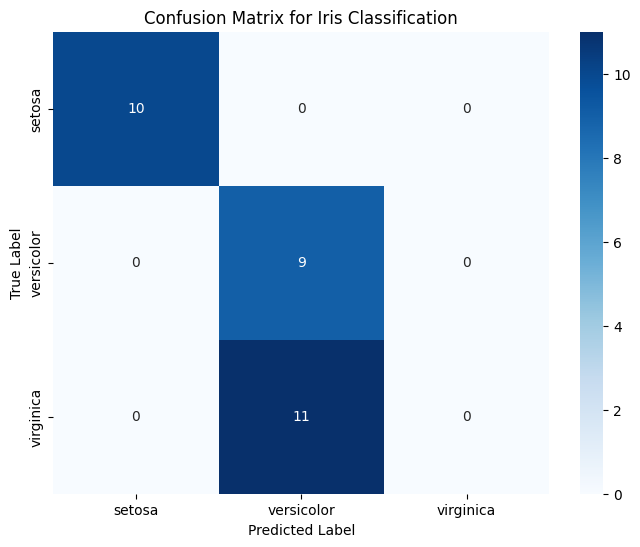

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.45      1.00      0.62         9
   virginica       0.00      0.00      0.00        11

    accuracy                           0.63        30
   macro avg       0.48      0.67      0.54        30
weighted avg       0.47      0.63      0.52        30



/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [39]:
# Convert y_test from one-hot to class indices if needed
if len(y_test.shape) > 1 and y_test.shape[1] > 1:
    y_test = np.argmax(y_test, axis=1)

import numpy as np

y_pred_probs = model.predict(X_test)  # probabilities for each class
y_pred = np.argmax(y_pred_probs, axis=1)  # predicted class labels

from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Now generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['setosa', 'versicolor', 'virginica'],
            yticklabels=['setosa', 'versicolor', 'virginica'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Iris Classification')
plt.show()

report = classification_report(y_test, y_pred, target_names=['setosa', 'versicolor', 'virginica'])
print(report)


In [37]:
model.export("./irisClassifierTensor")

INFO:tensorflow:Assets written to: ./irisClassifierTensor/assets


INFO:tensorflow:Assets written to: ./irisClassifierTensor/assets


Saved artifact at './irisClassifierTensor'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 4), dtype=tf.float32, name='keras_tensor_4')
Output Type:
  TensorSpec(shape=(None, 3), dtype=tf.float32, name=None)
Captures:
  13214339280: TensorSpec(shape=(), dtype=tf.resource, name=None)
  13214340240: TensorSpec(shape=(), dtype=tf.resource, name=None)
  13214340048: TensorSpec(shape=(), dtype=tf.resource, name=None)
  13214338896: TensorSpec(shape=(), dtype=tf.resource, name=None)
  13214340624: TensorSpec(shape=(), dtype=tf.resource, name=None)
  13214339856: TensorSpec(shape=(), dtype=tf.resource, name=None)


In [38]:
converter = tf.lite.TFLiteConverter.from_saved_model("./irisClassifierTensor")

converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_model = converter.convert()

with open('irisClassifierTFLite.tflite', 'wb') as f:
  f.write(tflite_model)

W0000 00:00:1750535012.921247 5609089 tf_tfl_flatbuffer_helpers.cc:365] Ignored output_format.
W0000 00:00:1750535012.921621 5609089 tf_tfl_flatbuffer_helpers.cc:368] Ignored drop_control_dependency.
2025-06-21 21:43:32.921804: I tensorflow/cc/saved_model/reader.cc:83] Reading SavedModel from: ./irisClassifierTensor
2025-06-21 21:43:32.922046: I tensorflow/cc/saved_model/reader.cc:52] Reading meta graph with tags { serve }
2025-06-21 21:43:32.922050: I tensorflow/cc/saved_model/reader.cc:147] Reading SavedModel debug info (if present) from: ./irisClassifierTensor
2025-06-21 21:43:32.924486: I tensorflow/cc/saved_model/loader.cc:236] Restoring SavedModel bundle.
2025-06-21 21:43:32.941993: I tensorflow/cc/saved_model/loader.cc:220] Running initialization op on SavedModel bundle at path: ./irisClassifierTensor
2025-06-21 21:43:32.945864: I tensorflow/cc/saved_model/loader.cc:471] SavedModel load for tags { serve }; Status: success: OK. Took 24061 microseconds.
